In [1]:
import cptac
import numpy as np
import pandas as pd
from gprofiler import GProfiler
import seaborn as sns
import matplotlib.pyplot as plt

cptac warning: Your version of cptac (0.8.8) is out-of-date. Latest is 0.9.0. Please run 'pip install --upgrade cptac' to update it. (<ipython-input-1-1cd1c7874502>, line 1)


In [2]:
permutation_df = pd.read_csv('data/full_10k_permutation_corrected.csv')
correlation_df = pd.read_csv('data/corr_diff.csv')
regression_df = pd.read_csv('data/regressions_data.csv')

In [3]:
permutation_df = pd.melt(permutation_df, id_vars='Cancer', var_name = 'Gene', value_name = 'perm_pval')
len(pd.unique(permutation_df.Gene))

13669

In [4]:
correlation_df = correlation_df.melt(id_vars='Cancer', var_name='Gene', value_name='delta_corr') 

In [5]:
regression_df = regression_df.rename(columns={'gene': 'Gene', 'cancer': 'Cancer'})
regression_df = regression_df[['Cancer', 'Gene', 'interaction_coeff', 'interaction_pval']]


In [6]:
df = pd.merge(permutation_df, correlation_df, how = 'outer')
df = pd.merge(df, regression_df, how = 'outer')
df = df.dropna()

In [7]:
background_genes = list(pd.unique(df.Gene))
len(background_genes)

12563

In [8]:
rows = []
for gene in pd.unique(df.Gene):
    row = {}
    gene_df = df[df.Gene == gene]
    gene_df = gene_df[gene_df.perm_pval <= 0.05]
    if len(gene_df) > 2:
        row['Gene'] = gene
        row['perm_pval'] = np.mean(gene_df.perm_pval)
        row['delta_corr'] = np.mean(gene_df.delta_corr)
        row['interaction_coeff'] = np.mean(gene_df.interaction_coeff)
        row['interaction_pval'] = np.mean(gene_df.interaction_pval)
        row['abs_interaction_coeff'] = abs(np.mean(gene_df.interaction_coeff))
        rows.append(row)
sig_perm_df = pd.DataFrame(rows)
sig_perm_df

,Gene,perm_pval,delta_corr,interaction_coeff,interaction_pval,abs_interaction_coeff
0,AAGAB,1.191913e-05,0.513239,0.743003,0.103060,0.743003
1,AAK1,2.187208e-09,0.539893,0.453549,0.005085,0.453549
2,AAMP,7.805338e-03,0.422332,0.834418,0.051275,0.834418
3,AARS,1.022777e-02,0.443220,0.518605,0.352149,0.518605
4,AARS2,1.766085e-05,0.563538,0.986707,0.012446,0.986707
...,...,...,...,...,...,...
3029,ZPR1,4.507710e-03,0.552338,0.766844,0.255208,0.766844
3030,ZSCAN18,9.995611e-03,0.461501,0.204678,0.498252,0.204678
3031,ZW10,1.301439e-03,0.481355,0.596254,0.095312,0.596254
3032,ZWINT,2.499200e-03,0.854401,1.130649,0.002518,1.130649


In [9]:
rows = []
for gene in pd.unique(df.Gene):
    row = {}
    gene_df = df[df.Gene == gene]
    gene_df = gene_df[gene_df.interaction_pval <= 0.05]
    if len(gene_df) > 2:
        row['Gene'] = gene
        row['perm_pval'] = np.mean(gene_df.perm_pval)
        row['delta_corr'] = np.mean(gene_df.delta_corr)
        row['interaction_coeff'] = np.mean(gene_df.interaction_coeff)
        row['interaction_pval'] = np.mean(gene_df.interaction_pval)
        row['abs_interaction_coeff'] = abs(np.mean(gene_df.interaction_coeff))
        rows.append(row)
sig_regression_df = pd.DataFrame(rows)
sig_regression_df

,Gene,perm_pval,delta_corr,interaction_coeff,interaction_pval,abs_interaction_coeff
0,AAK1,2.187208e-09,0.539893,0.453549,0.005085,0.453549
1,AARS2,1.575518e-01,0.399337,0.719068,0.015352,0.719068
2,AASDHPPT,4.554894e-09,0.569367,0.850032,0.001351,0.850032
3,AASS,9.059842e-08,0.516246,1.079797,0.015262,1.079797
4,ABCB10,2.677682e-02,0.345190,1.149501,0.013915,1.149501
...,...,...,...,...,...,...
1218,ZNF638,2.620840e-04,0.647382,1.012607,0.002426,1.012607
1219,ZNF687,5.961230e-04,0.622238,0.797145,0.014088,0.797145
1220,ZNFX1,6.527134e-02,0.420009,0.388419,0.005495,0.388419
1221,ZNHIT2,5.211000e-05,0.664401,0.756881,0.000306,0.756881


In [10]:
gp = GProfiler(return_dataframe=True)

In [11]:
sig_perm_unranked = pd.unique(sig_perm_df.Gene)
sig_perm_df = sig_perm_df.sort_values(by = 'abs_interaction_coeff', ascending = False)
sig_perm_slope = pd.unique(sig_perm_df.Gene)
sig_perm_upregulated = sig_perm_df[sig_perm_df.interaction_coeff >= 0]
sig_perm_upregulated_unranked = pd.unique(sig_perm_upregulated.Gene)
sig_perm_upregulated = sig_perm_upregulated.sort_values(by = 'interaction_coeff', ascending = False)
sig_perm_upregulated = pd.unique(sig_perm_upregulated.Gene)
sig_perm_downregulated = sig_perm_df[sig_perm_df.interaction_coeff <= 0]
sig_perm_downregulated_unranked = pd.unique(sig_perm_downregulated.Gene)
sig_perm_downregulated = sig_perm_downregulated.sort_values(by = 'interaction_coeff')
sig_perm_downregulated = pd.unique(sig_perm_downregulated.Gene)

In [12]:
sig_perm_unranked = gp.profile(organism='hsapiens', query = list(sig_perm_unranked), no_iea=True,
                       ordered=False, no_evidences=False, background= background_genes, sources = ['KEGG'])

In [13]:
sig_perm_slope = gp.profile(organism='hsapiens', query = list(sig_perm_slope), no_iea=True,
                       ordered=True, no_evidences=False, background= background_genes, sources = ['KEGG'])

In [14]:
sig_perm_upregulated_unranked = gp.profile(organism='hsapiens', query = list(sig_perm_upregulated_unranked), no_iea=True,
                       ordered=False, no_evidences=False, background= background_genes, sources = ['KEGG'])

In [15]:
sig_perm_upregulated = gp.profile(organism='hsapiens', query = list(sig_perm_upregulated), no_iea=True,
                       ordered=True, no_evidences=False, background= background_genes, sources = ['KEGG'])

In [16]:
sig_perm_downregulated_unranked = gp.profile(organism='hsapiens', query = list(sig_perm_downregulated_unranked), no_iea=True,
                       ordered=False, no_evidences=False, background= background_genes, sources = ['KEGG'])

In [17]:
sig_perm_downregulated = gp.profile(organism='hsapiens', query = list(sig_perm_downregulated), no_iea=True,
                       ordered=True, no_evidences=False, background= background_genes, sources = ['KEGG'])

In [18]:
sig_regression_unranked = pd.unique(sig_regression_df.Gene)
sig_regression_df = sig_regression_df.sort_values(by = 'abs_interaction_coeff', ascending = False)
sig_regression_slope = pd.unique(sig_regression_df.Gene)
sig_regression_upregulated = sig_regression_df[sig_regression_df.interaction_coeff >= 0]
sig_regression_upregulated_unranked = pd.unique(sig_regression_upregulated.Gene)
sig_regression_upregulated = sig_regression_upregulated.sort_values(by = 'interaction_coeff', ascending = False)
sig_regression_upregulated = pd.unique(sig_regression_upregulated.Gene)
sig_regression_downregulated = sig_regression_df[sig_regression_df.interaction_coeff <= 0]
sig_regression_downregulated_unranked = pd.unique(sig_regression_downregulated.Gene)
sig_regression_downregulated = sig_regression_downregulated.sort_values(by = 'interaction_coeff')
sig_regression_downregulated = pd.unique(sig_regression_downregulated.Gene)

In [19]:
sig_regression_unranked = gp.profile(organism='hsapiens', query = list(sig_regression_unranked), no_iea=True,
                       ordered=False, no_evidences=False, background= background_genes, sources = ['KEGG'])

In [20]:
sig_regression_slope = gp.profile(organism='hsapiens', query = list(sig_regression_slope), no_iea=True,
                       ordered=True, no_evidences=False, background= background_genes, sources = ['KEGG'])

In [21]:
sig_regression_upregulated_unranked = gp.profile(organism='hsapiens', query = list(sig_regression_upregulated_unranked), no_iea=True,
                       ordered=False, no_evidences=False, background= background_genes, sources = ['KEGG'])

In [22]:
sig_regression_upregulated = gp.profile(organism='hsapiens', query = list(sig_regression_upregulated), no_iea=True,
                       ordered=True, no_evidences=False, background= background_genes, sources = ['KEGG'])

In [23]:
sig_regression_downregulated_unranked = gp.profile(organism='hsapiens', query = list(sig_regression_downregulated_unranked), no_iea=True,
                       ordered=False, no_evidences=False, background= background_genes, sources = ['KEGG'])

In [24]:
sig_regression_downregulated = gp.profile(organism='hsapiens', query = list(sig_regression_downregulated), no_iea=True,
                       ordered=True, no_evidences=False, background= background_genes, sources = ['KEGG'])

In [25]:
sig_perm_unranked[sig_perm_unranked.term_size < 500]
sig_perm_unranked[sig_perm_unranked.term_size > 15]
sig_perm_unranked

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents,intersections,evidences
0,KEGG,KEGG:01100,Metabolic pathways,0.000003,True,Metabolic pathways,1234,2983,375,12497,0.125712,0.303890,query_1,[KEGG:00000],"[AASS, ABAT, ACAA2, ACACA, ACAD8, ACADL, ACADM...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
1,KEGG,KEGG:01240,Biosynthesis of cofactors,0.000097,True,Biosynthesis of cofactors,132,2983,57,12497,0.019108,0.431818,query_1,[KEGG:00000],"[ADSL, ADSS, AK1, AK3, AK4, AK6, ALAD, ALDH3A2...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
2,KEGG,KEGG:00280,"Valine, leucine and isoleucine degradation",0.000776,True,"Valine, leucine and isoleucine degradation",48,2983,26,12497,0.008716,0.541667,query_1,[KEGG:00000],"[ABAT, ACAA2, ACAD8, ACADM, ACADS, ACADSB, ACA...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
3,KEGG,KEGG:00240,Pyrimidine metabolism,0.000915,True,Pyrimidine metabolism,51,2983,27,12497,0.009051,0.529412,query_1,[KEGG:00000],"[CAD, CANT1, CMPK1, CMPK2, CTPS1, CTPS2, DCK, ...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
4,KEGG,KEGG:00970,Aminoacyl-tRNA biosynthesis,0.004589,True,Aminoacyl-tRNA biosynthesis,28,2983,17,12497,0.005699,0.607143,query_1,[KEGG:00000],"[AARS2, CARS, DARS2, FARS2, HARS2, IARS2, MARS...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
5,KEGG,KEGG:01230,Biosynthesis of amino acids,0.004802,True,Biosynthesis of amino acids,72,2983,33,12497,0.011063,0.458333,query_1,[KEGG:00000],"[ACY1, ALDH18A1, ALDOA, ALDOC, ARG1, ARG2, ASN...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
6,KEGG,KEGG:00000,KEGG root term,0.006792,True,KEGG root term,5469,2983,1398,12497,0.468656,0.255623,query_1,[],"[AARS2, AASDHPPT, AASS, ABAT, ABCA3, ABCB6, AB...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
7,KEGG,KEGG:01200,Carbon metabolism,0.007117,True,Carbon metabolism,110,2983,45,12497,0.015085,0.409091,query_1,[KEGG:00000],"[ACADS, ACAT1, ALDH6A1, ALDOA, ALDOC, CPS1, CS...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
8,KEGG,KEGG:05164,Influenza A,0.008784,True,Influenza A,130,2983,51,12497,0.017097,0.392308,query_1,[KEGG:00000],"[ADAR, AKT2, AKT3, BAK1, BID, CASP1, CCL5, CDK...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
9,KEGG,KEGG:04217,Necroptosis,0.009234,True,Necroptosis,111,2983,45,12497,0.015085,0.405405,query_1,[KEGG:00000],"[BID, CAMK2D, CASP1, CHMP1B, CHMP2A, CHMP2B, C...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."


In [26]:
sig_perm_unranked['Analysis'] = ['perm_unranked'] * len(sig_perm_unranked)
sig_perm_slope['Analysis'] = ['perm_slope'] * len(sig_perm_slope)
sig_perm_upregulated_unranked['Analysis'] = ['perm_upregulated_unranked'] * len(sig_perm_upregulated_unranked)
sig_perm_upregulated['Analysis'] = ['perm_upregulated'] * len(sig_perm_upregulated)
sig_perm_downregulated_unranked['Analysis'] = ['perm_downregulated_unranked'] * len(sig_perm_downregulated_unranked)
sig_perm_downregulated['Analysis'] = ['perm_downregulated'] * len(sig_perm_downregulated)

In [27]:
sig_regression_unranked['Analysis'] = ['regression_unranked'] * len(sig_regression_unranked)
sig_regression_slope['Analysis'] = ['regression_slope'] * len(sig_regression_slope)
sig_regression_upregulated_unranked['Analysis'] = ['regression_upregulated_unranked'] * len(sig_regression_upregulated_unranked)
sig_regression_upregulated['Analysis'] = ['regression_upregulated'] * len(sig_regression_upregulated)
sig_regression_downregulated_unranked['Analysis'] = ['regression_downregulated_unranked'] * len(sig_regression_downregulated_unranked)
sig_regression_downregulated['Analysis'] = ['regression_downregulated'] * len(sig_regression_downregulated)

In [28]:
upregulated_pathways = [sig_perm_unranked, sig_perm_slope,sig_perm_upregulated_unranked,sig_perm_upregulated,sig_regression_unranked,sig_regression_slope,
                       sig_regression_upregulated_unranked,sig_regression_upregulated]

In [29]:
upregulated_pathways_df = pd.concat(upregulated_pathways)
upregulated_pathways_df = upregulated_pathways_df[upregulated_pathways_df.term_size < 500]
upregulated_pathways_df = upregulated_pathways_df[upregulated_pathways_df.term_size > 15]
upregulated_pathways_df

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents,intersections,evidences,Analysis
1,KEGG,KEGG:01240,Biosynthesis of cofactors,0.000097,True,Biosynthesis of cofactors,132,2983,57,12497,0.019108,0.431818,query_1,[KEGG:00000],"[ADSL, ADSS, AK1, AK3, AK4, AK6, ALAD, ALDH3A2...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG...",perm_unranked
2,KEGG,KEGG:00280,"Valine, leucine and isoleucine degradation",0.000776,True,"Valine, leucine and isoleucine degradation",48,2983,26,12497,0.008716,0.541667,query_1,[KEGG:00000],"[ABAT, ACAA2, ACAD8, ACADM, ACADS, ACADSB, ACA...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG...",perm_unranked
3,KEGG,KEGG:00240,Pyrimidine metabolism,0.000915,True,Pyrimidine metabolism,51,2983,27,12497,0.009051,0.529412,query_1,[KEGG:00000],"[CAD, CANT1, CMPK1, CMPK2, CTPS1, CTPS2, DCK, ...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG...",perm_unranked
4,KEGG,KEGG:00970,Aminoacyl-tRNA biosynthesis,0.004589,True,Aminoacyl-tRNA biosynthesis,28,2983,17,12497,0.005699,0.607143,query_1,[KEGG:00000],"[AARS2, CARS, DARS2, FARS2, HARS2, IARS2, MARS...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG...",perm_unranked
5,KEGG,KEGG:01230,Biosynthesis of amino acids,0.004802,True,Biosynthesis of amino acids,72,2983,33,12497,0.011063,0.458333,query_1,[KEGG:00000],"[ACY1, ALDH18A1, ALDOA, ALDOC, ARG1, ARG2, ASN...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG...",perm_unranked
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,KEGG,KEGG:00250,"Alanine, aspartate and glutamate metabolism",0.004124,True,"Alanine, aspartate and glutamate metabolism",32,890,11,12497,0.012360,0.343750,query_1,[KEGG:00000],"[ADSL, PPAT, GFPT1, GFPT2, GLUD1, CAD, GLS, AS...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG...",regression_upregulated
3,KEGG,KEGG:04115,p53 signaling pathway,0.011178,True,p53 signaling pathway,59,848,15,12497,0.017689,0.254237,query_1,[KEGG:00000],"[CDK1, CCNB1, CHEK1, SERPINB5, SFN, SERPINE1, ...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG...",regression_upregulated
4,KEGG,KEGG:00270,Cysteine and methionine metabolism,0.012949,True,Cysteine and methionine metabolism,46,1020,13,12497,0.012745,0.282609,query_1,[KEGG:00000],"[DNMT3A, AHCYL1, GCLC, PSAT1, AHCY, GCLM, IL4I...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG...",regression_upregulated
5,KEGG,KEGG:01200,Carbon metabolism,0.031913,True,Carbon metabolism,110,915,20,12497,0.021858,0.181818,query_1,[KEGG:00000],"[RPIA, PGK1, PSPH, RPE, GCSH, GLUD1, PSAT1, SH...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG...",regression_upregulated


In [30]:
upregulated_pathways_df['p_value'] = -np.log10(upregulated_pathways_df['p_value'])

Text(0.5, 0, '-log10 p-value')

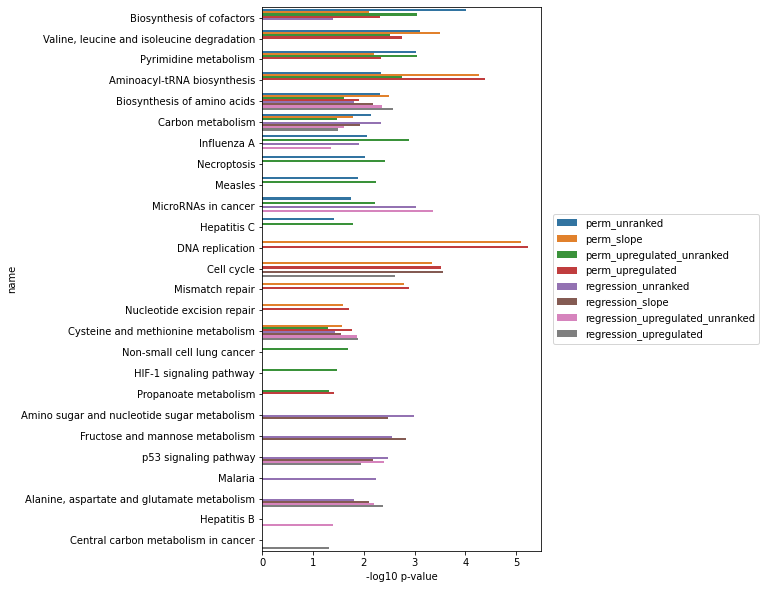

In [31]:
plt.figure(figsize=(5,10))
g = sns.barplot(data = upregulated_pathways_df,
               x = 'p_value', y = 'name', hue = 'Analysis')
g.legend(loc='center right', bbox_to_anchor=(1.8, .5))
plt.xlabel('-log10 p-value')

In [32]:
num_upregulated_analyses = len(pd.unique(upregulated_pathways_df.Analysis))

In [33]:
pd.set_option('display.max_colwidth', -1)

<ipython-input-33-0891b765a168>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [34]:
upregulated_pathways = []
upregulated_analyses = []
for pathway in pd.unique(upregulated_pathways_df.name):
    pathway_df = upregulated_pathways_df[upregulated_pathways_df.name == pathway]
    analyses = set(pathway_df.Analysis)
    if analyses not in upregulated_analyses:
        upregulated_analyses.append(analyses)
        upregulated_pathways.append({pathway})
    else:
        i = upregulated_analyses.index(analyses)
        upregulated_pathways[i].add(pathway)
upregulated_pathways_df = pd.DataFrame({'Analyses':upregulated_analyses, 'Pathways': upregulated_pathways})
upregulated_pathways_df['Pathway_Frequency'] = [len(a) / num_upregulated_analyses for a in upregulated_pathways_df.Analyses]
upregulated_pathways_df = upregulated_pathways_df.sort_values(by = 'Pathway_Frequency', ascending = False)
upregulated_pathways_df

,Analyses,Pathways,Pathway_Frequency
2,"{perm_upregulated_unranked, perm_unranked, regression_unranked, perm_slope, regression_upregulated_unranked, regression_upregulated, perm_upregulated, regression_slope}",{Biosynthesis of amino acids},1.000
3,"{perm_upregulated_unranked, perm_unranked, regression_unranked, perm_slope, regression_upregulated_unranked, regression_upregulated, regression_slope}",{Carbon metabolism},0.875
8,"{perm_upregulated_unranked, regression_unranked, perm_slope, regression_upregulated_unranked, regression_upregulated, perm_upregulated, regression_slope}",{Cysteine and methionine metabolism},0.875
0,"{perm_upregulated_unranked, perm_unranked, regression_unranked, perm_slope, perm_upregulated}",{Biosynthesis of cofactors},0.625
1,"{perm_slope, perm_unranked, perm_upregulated_unranked, perm_upregulated}","{Pyrimidine metabolism, Aminoacyl-tRNA biosynthesis, Valine, leucine and isoleucine degradation}",0.500
4,"{regression_unranked, perm_unranked, perm_upregulated_unranked, regression_upregulated_unranked}","{MicroRNAs in cancer, Influenza A}",0.500
7,"{regression_upregulated, perm_slope, perm_upregulated, regression_slope}",{Cell cycle},0.500
12,"{regression_unranked, regression_upregulated_unranked, regression_upregulated, regression_slope}","{Alanine, aspartate and glutamate metabolism, p53 signaling pathway}",0.500
5,"{perm_unranked, perm_upregulated_unranked}","{Hepatitis C, Measles, Necroptosis}",0.250
6,"{perm_slope, perm_upregulated}","{Mismatch repair, DNA replication, Nucleotide excision repair}",0.250


In [35]:
rows = []
for index, row in upregulated_pathways_df.iterrows():
    pathways = row.Pathways
    for pathway in pathways:
        new_row = dict()
        new_row['Pathway'] = pathway
        new_row['Frequency'] = row.Pathway_Frequency
        rows.append(new_row)
upregulated_pathways_df = pd.DataFrame(rows)
upregulated_pathways_df

,Pathway,Frequency
0,Biosynthesis of amino acids,1.000
1,Carbon metabolism,0.875
2,Cysteine and methionine metabolism,0.875
3,Biosynthesis of cofactors,0.625
4,Pyrimidine metabolism,0.500
5,Aminoacyl-tRNA biosynthesis,0.500
6,"Valine, leucine and isoleucine degradation",0.500
7,MicroRNAs in cancer,0.500
8,Influenza A,0.500
9,Cell cycle,0.500


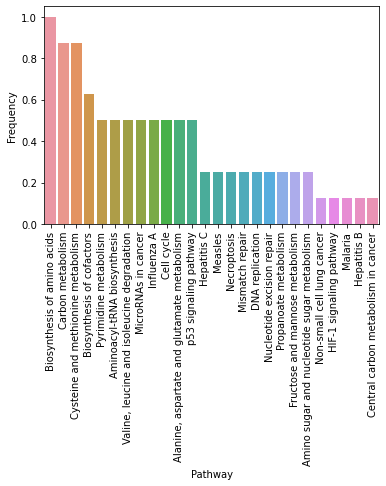

In [36]:
axes = sns.barplot(data = upregulated_pathways_df, x = 'Pathway', y = 'Frequency')
axes.tick_params(axis = 'x', labelrotation = 90)

In [37]:
downregulated_pathways = [sig_perm_unranked, sig_perm_slope,sig_perm_downregulated_unranked,sig_perm_downregulated,sig_regression_unranked,sig_regression_slope,
                       sig_regression_downregulated_unranked,sig_regression_downregulated]
downregulated_pathways_df = pd.concat(downregulated_pathways)
num_downregulated_analyses = len(pd.unique(downregulated_pathways_df.Analysis))

In [38]:
downregulated_pathways = []
downregulated_analyses = []
for pathway in pd.unique(downregulated_pathways_df.name):
    pathway_df = downregulated_pathways_df[downregulated_pathways_df.name == pathway]
    analyses = set(pathway_df.Analysis)
    if analyses not in downregulated_analyses:
        downregulated_analyses.append(analyses)
        downregulated_pathways.append({pathway})
    else:
        i = downregulated_analyses.index(analyses)
        downregulated_pathways[i].add(pathway)
downregulated_pathways_df = pd.DataFrame({'Analyses':downregulated_analyses, 'Pathways': downregulated_pathways})
downregulated_pathways_df['Pathway_Frequency'] = [len(a) / num_downregulated_analyses for a in downregulated_pathways_df.Analyses]
downregulated_pathways_df = downregulated_pathways_df.sort_values(by = 'Pathway_Frequency', ascending = False)
downregulated_pathways_df

,Analyses,Pathways,Pathway_Frequency
3,"{regression_unranked, perm_slope, perm_unranked, regression_slope}","{Carbon metabolism, Biosynthesis of amino acids}",0.500
0,"{regression_unranked, perm_unranked, regression_downregulated_unranked}",{Metabolic pathways},0.375
1,"{regression_unranked, perm_slope, perm_unranked}",{Biosynthesis of cofactors},0.375
14,"{regression_unranked, regression_downregulated_unranked, regression_downregulated}",{Malaria},0.375
12,"{regression_unranked, regression_downregulated_unranked, regression_slope}",{Amino sugar and nucleotide sugar metabolism},0.375
8,"{regression_unranked, perm_slope, regression_slope}",{Cysteine and methionine metabolism},0.375
7,"{perm_slope, regression_slope}",{Cell cycle},0.250
5,"{regression_unranked, perm_unranked}","{MicroRNAs in cancer, Influenza A}",0.250
9,"{perm_downregulated, perm_downregulated_unranked}",{Hematopoietic cell lineage},0.250
10,"{perm_downregulated, regression_downregulated}","{Cholesterol metabolism, Phagosome}",0.250
